# <h>Heart Disease analysis with classification</h>

**Authors:** Lola Sõukand, Robin Mürk

**Data:** https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset/discussion

Aim is to build a binary classifier that predicts a person's risk of a heart attack and to analyse individual attributes to determine what lowers and what increases the risk of heart attack using regression analysis.

**Goal 1:** train a model to predict whether or not a patient is at high risk or at low risk of a heart attack.<br>
**Goal 2:** find factors,that lower the risk of heart attack <br>
**Goal 3:** find factors, that increase the risk of heart attack <br>

------------------------------------------  

## Initial data viewing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
plt.style.use('ggplot')
data=pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
data = data.astype(int)
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,0,1,1,1,18,0,0,2,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [4]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   Diabetes              253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

                  column      No     Yes
0   HeartDiseaseorAttack  229787   23893
1                 HighBP  144851  108829
2               HighChol  146089  107591
3              CholCheck    9470  244210
4                 Smoker  141257  112423
5                 Stroke  243388   10292
6           PhysActivity   61760  191920
7                 Fruits   92782  160898
8                Veggies   47839  205841
9      HvyAlcoholConsump  239424   14256
10         AnyHealthcare   12417  241263
11           NoDocbcCost  232326   21354
12              DiffWalk  211005   42675


<Axes: title={'center': 'i hate it'}, xlabel='column'>

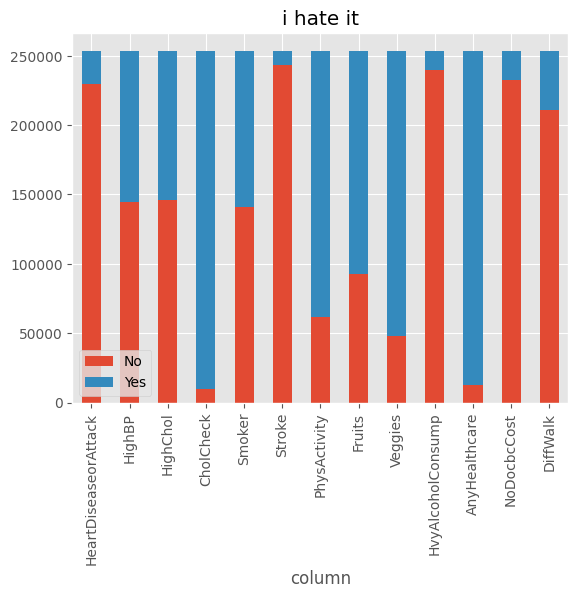

In [6]:
#Binary column graph
counts_df = pd.DataFrame(columns=['column', 'No', 'Yes'])

for col in ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 
       'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']:
    counts1 = data[col].value_counts()[1.0]
    counts0 = data[col].value_counts()[0.0]
    
    counts_df = pd.concat([counts_df, pd.DataFrame([{'column': col, 'No': counts0, 'Yes': counts1}])], ignore_index=True)

print(counts_df)
counts_df.plot.bar(x='column', stacked=True, title='i hate it')

<Axes: xlabel='BMI'>

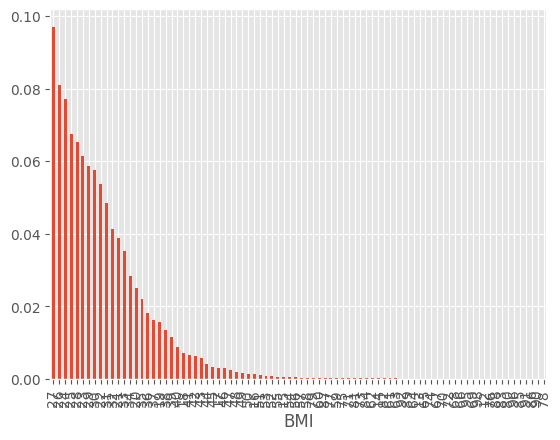

In [7]:
data['BMI'].value_counts(normalize=True).plot(kind="bar")

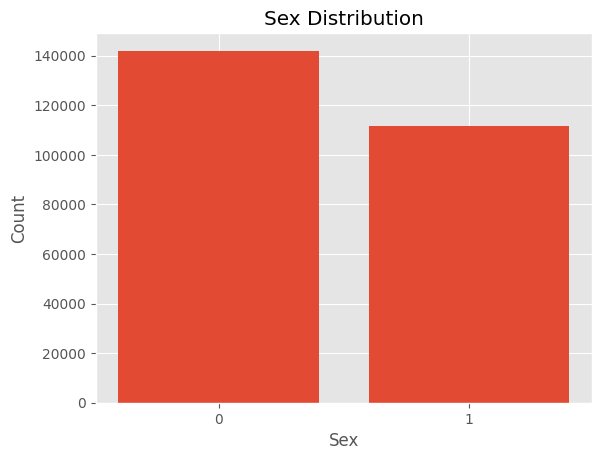

In [8]:
sex_counts = data['Sex'].value_counts()
plt.bar(sex_counts.index.astype(str), sex_counts.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Distribution')
plt.show()

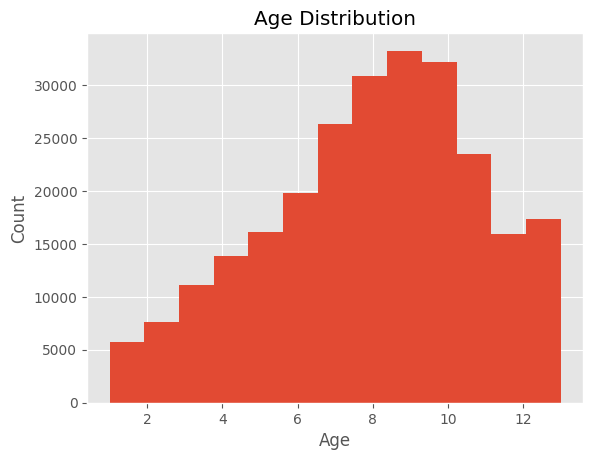

In [9]:
plt.hist(data['Age'], bins=13)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

<Axes: >

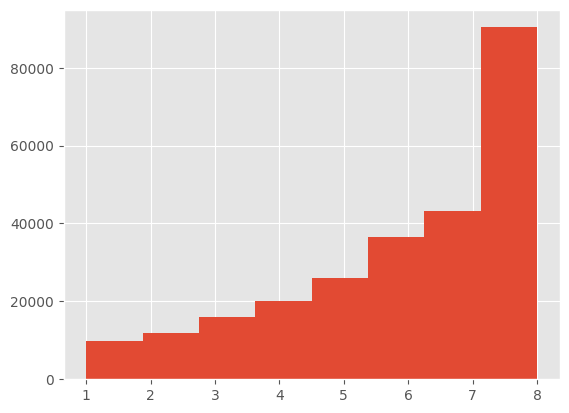

In [10]:
data['Income'].hist(bins=8)

----------------------------------------
# Correlestions

<Axes: >

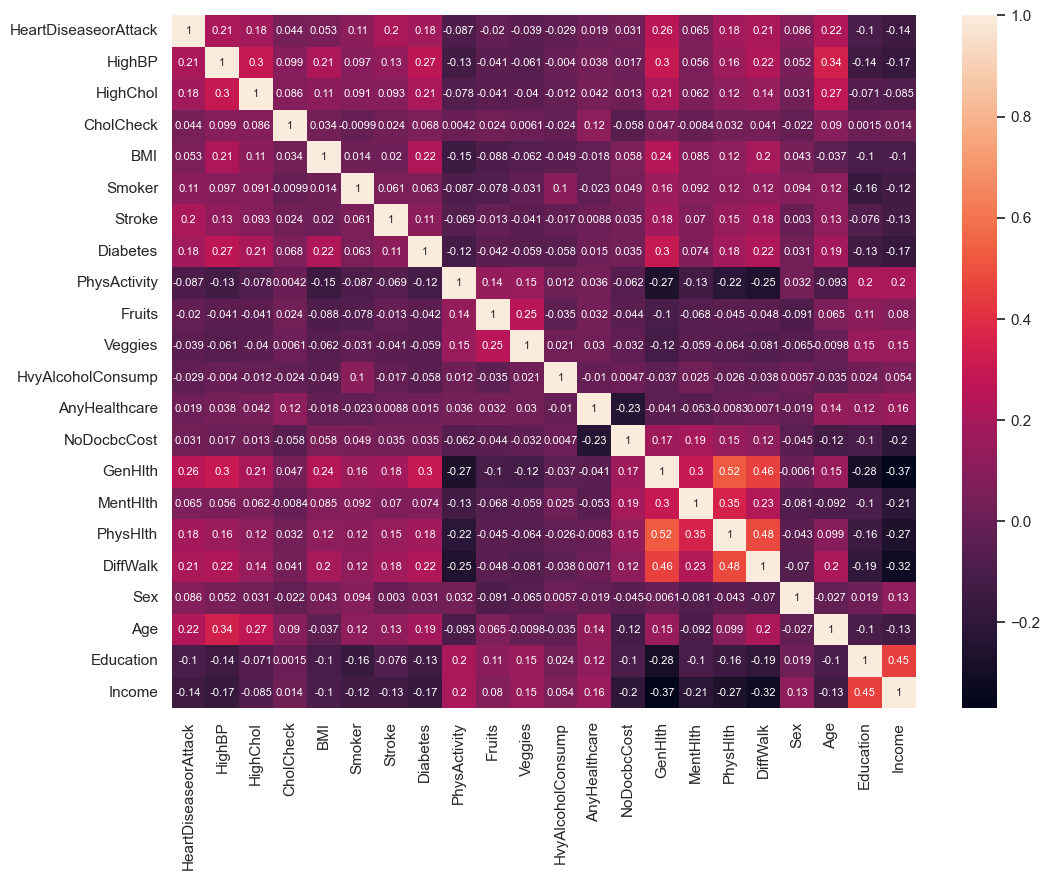

In [11]:
corr_matrix = data.corr()
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(corr_matrix, annot=True,annot_kws={"size": 8})

In [12]:
from scipy.stats import pointbiserialr

corr_matrix = np.zeros((len(data.columns), len(data.columns)))
for i in range(len(data.columns)):
    for j in range(len(data.columns)):
        if i == j:
            corr_matrix[i][j] = 1
        else:
            corr, p_value = pointbiserialr(data.iloc[:, i], data.iloc[:, j])
            corr_matrix[i][j] = corr
corr_df = pd.DataFrame(corr_matrix, columns=data.columns, index=data.columns)
print(corr_df)

                      HeartDiseaseorAttack    HighBP  HighChol  CholCheck  \
HeartDiseaseorAttack              1.000000  0.209361  0.180765   0.044206   
HighBP                            0.209361  1.000000  0.298199   0.098508   
HighChol                          0.180765  0.298199  1.000000   0.085642   
CholCheck                         0.044206  0.098508  0.085642   1.000000   
BMI                               0.052904  0.213748  0.106722   0.034495   
Smoker                            0.114441  0.096991  0.091299  -0.009929   
Stroke                            0.203002  0.129575  0.092620   0.024158   
Diabetes                          0.180272  0.271596  0.209085   0.067546   
PhysActivity                     -0.087299 -0.125267 -0.078046   0.004190   
Fruits                           -0.019790 -0.040555 -0.040859   0.023849   
Veggies                          -0.039167 -0.061266 -0.039874   0.006121   
HvyAlcoholConsump                -0.028991 -0.003972 -0.011543  -0.023730   

---------------------
### P-value


In [13]:
for column in data.columns[1:]:
    corr,p_value = pearsonr(data[column], data['HeartDiseaseorAttack'])
    print(f'The correlation between heart disease and {column}  is {corr:.2f} with a p-value of {p_value:.2e}')

The correlation between heart disease and HighBP  is 0.21 with a p-value of 0.00e+00
The correlation between heart disease and HighChol  is 0.18 with a p-value of 0.00e+00
The correlation between heart disease and CholCheck  is 0.04 with a p-value of 6.35e-110
The correlation between heart disease and BMI  is 0.05 with a p-value of 1.21e-156
The correlation between heart disease and Smoker  is 0.11 with a p-value of 0.00e+00
The correlation between heart disease and Stroke  is 0.20 with a p-value of 0.00e+00
The correlation between heart disease and Diabetes  is 0.18 with a p-value of 0.00e+00
The correlation between heart disease and PhysActivity  is -0.09 with a p-value of 0.00e+00
The correlation between heart disease and Fruits  is -0.02 with a p-value of 2.09e-23
The correlation between heart disease and Veggies  is -0.04 with a p-value of 1.08e-86
The correlation between heart disease and HvyAlcoholConsump  is -0.03 with a p-value of 2.63e-48
The correlation between heart disease

In [14]:
from scipy.stats import pointbiserialr

for column in data.columns[1:]:
    if data[column].dtype == int and set(data[column].unique()) == {0, 1}:
        corr, p_value = pointbiserialr(data[column], data['HeartDiseaseorAttack'])
        print(f'The point-biserial correlation between heart disease and {column} is {corr:.2f} with a p-value of {p_value:.2e}')
    else:
        print(f'Skipping {column} as it does not contain binary numeric data (0 or 1).')

The point-biserial correlation between heart disease and HighBP is 0.21 with a p-value of 0.00e+00
The point-biserial correlation between heart disease and HighChol is 0.18 with a p-value of 0.00e+00
The point-biserial correlation between heart disease and CholCheck is 0.04 with a p-value of 6.35e-110
Skipping BMI as it does not contain binary numeric data (0 or 1).
The point-biserial correlation between heart disease and Smoker is 0.11 with a p-value of 0.00e+00
The point-biserial correlation between heart disease and Stroke is 0.20 with a p-value of 0.00e+00
Skipping Diabetes as it does not contain binary numeric data (0 or 1).
The point-biserial correlation between heart disease and PhysActivity is -0.09 with a p-value of 0.00e+00
The point-biserial correlation between heart disease and Fruits is -0.02 with a p-value of 2.09e-23
The point-biserial correlation between heart disease and Veggies is -0.04 with a p-value of 1.08e-86
The point-biserial correlation between heart disease an

In [15]:
from scipy.stats import spearmanr
for column in corr_df.columns:
    corr, p_value = spearmanr(data[column], data['HeartDiseaseorAttack'])
    print(f"The correlation between variable1 and {column} is {corr:.2f} with a p-value of {p_value:.2e}")

The correlation between variable1 and HeartDiseaseorAttack is 1.00 with a p-value of 0.00e+00
The correlation between variable1 and HighBP is 0.21 with a p-value of 0.00e+00
The correlation between variable1 and HighChol is 0.18 with a p-value of 0.00e+00
The correlation between variable1 and CholCheck is 0.04 with a p-value of 6.35e-110
The correlation between variable1 and BMI is 0.06 with a p-value of 5.12e-226
The correlation between variable1 and Smoker is 0.11 with a p-value of 0.00e+00
The correlation between variable1 and Stroke is 0.20 with a p-value of 0.00e+00
The correlation between variable1 and Diabetes is 0.18 with a p-value of 0.00e+00
The correlation between variable1 and PhysActivity is -0.09 with a p-value of 0.00e+00
The correlation between variable1 and Fruits is -0.02 with a p-value of 2.09e-23
The correlation between variable1 and Veggies is -0.04 with a p-value of 1.08e-86
The correlation between variable1 and HvyAlcoholConsump is -0.03 with a p-value of 2.63e-4

In [16]:
from scipy.stats import chi2_contingency

for column in data.columns:
    contingency_table = pd.crosstab(data[column], data['HeartDiseaseorAttack'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"The chi-squared statistic is {chi2:.2f} with a p-value of {p_value:.2e}")

The chi-squared statistic is 253668.28 with a p-value of 0.00e+00
The chi-squared statistic is 11117.88 with a p-value of 0.00e+00
The chi-squared statistic is 8288.02 with a p-value of 0.00e+00
The chi-squared statistic is 494.93 with a p-value of 1.20e-109
The chi-squared statistic is 1251.19 with a p-value of 7.40e-208
The chi-squared statistic is 3321.61 with a p-value of 0.00e+00
The chi-squared statistic is 10450.58 with a p-value of 0.00e+00
The chi-squared statistic is 8244.89 with a p-value of 0.00e+00
The chi-squared statistic is 1932.63 with a p-value of 0.00e+00
The chi-squared statistic is 99.22 with a p-value of 2.27e-23
The chi-squared statistic is 388.82 with a p-value of 1.49e-86
The chi-squared statistic is 212.77 with a p-value of 3.41e-48
The chi-squared statistic is 88.74 with a p-value of 4.51e-21
The chi-squared statistic is 243.40 with a p-value of 7.14e-55
The chi-squared statistic is 19008.16 with a p-value of 0.00e+00
The chi-squared statistic is 1299.47 with

In [17]:
from scipy import stats

for column in data.columns:
    print(column, stats.ttest_ind(data[column], data['HeartDiseaseorAttack'], equal_var = False))

HeartDiseaseorAttack TtestResult(statistic=0.0, pvalue=1.0, df=507358.0)
HighBP TtestResult(statistic=293.43421980000585, pvalue=0.0, df=411266.8675348625)
HighChol TtestResult(statistic=289.47150489597766, pvalue=0.0, df=411628.91020848183)
CholCheck TtestResult(statistic=1256.2044090479524, pvalue=0.0, df=435186.9146909644)
BMI TtestResult(statistic=2153.8163518594693, pvalue=0.0, df=254670.07594350976)
Smoker TtestResult(statistic=305.0155367848226, pvalue=0.0, df=410358.2058330039)
Stroke TtestResult(statistic=-76.61204811413708, pvalue=0.0, df=445277.2009748506)
Diabetes TtestResult(statistic=134.925455144408, pvalue=0.0, df=339842.8353427882)
PhysActivity TtestResult(statistic=642.622184693992, pvalue=0.0, df=447172.4157016826)
Fruits TtestResult(statistic=482.90779564929676, pvalue=0.0, df=418041.0832438669)
Veggies TtestResult(statistic=739.9661527048132, pvalue=0.0, df=469473.557104891)
HvyAlcoholConsump TtestResult(statistic=-51.44024407057642, pvalue=0.0, df=481171.428064214

In [18]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(data['HeartDiseaseorAttack'], data['HighBP'])
print(f'T-statistic: {t_stat:.4f}, p-value: {p_value:.4e}')

T-statistic: -293.4342, p-value: 0.0000e+00


In [19]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['HeartDiseaseorAttack'], data['HighBP'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-squared statistic: {chi2_stat:.4f}')
print(f'P-value: {p_value:.4e}')

Chi-squared statistic: 11117.8831
P-value: 0.0000e+00


----------------------------------------------------------------
# Data visualization



HighChol
CholCheck
BMI
Smoker
Stroke
Diabetes
PhysActivity
Fruits
Veggies
HvyAlcoholConsump
AnyHealthcare
NoDocbcCost
GenHlth
MentHlth
PhysHlth
DiffWalk
Sex
Age
Education
Income 

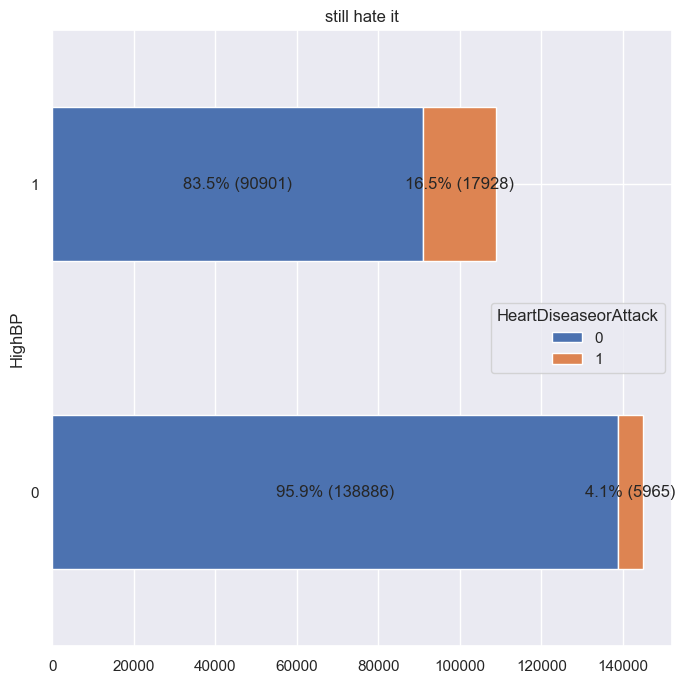

In [21]:
# For graph
def plot_figure(pivot_table, title, xpos,x,y):
    ax = pivot_table.plot.barh(stacked = True, figsize = (x,y))
    labels = []
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                label = ""
            else:                                                                                                                       
                label = str(round((pivot_table.loc[i][j]/sum(pivot_table.loc[i]))*100,1)) + "% (" + str(pivot_table.loc[i][j].astype('int64')) + ")"
            labels.append(label)
    
    patches = ax.patches
    for label, rect in zip(labels, patches):
        width = rect.get_width()
        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()

            if width>xpos: 
                ax.text(x + width/2, y + height/2., label, ha='center', va='center')
            else:
                ax.text(x + xpos, y + height/2., label, ha='center', va='center')
    plt.title(title)
    plt.show()

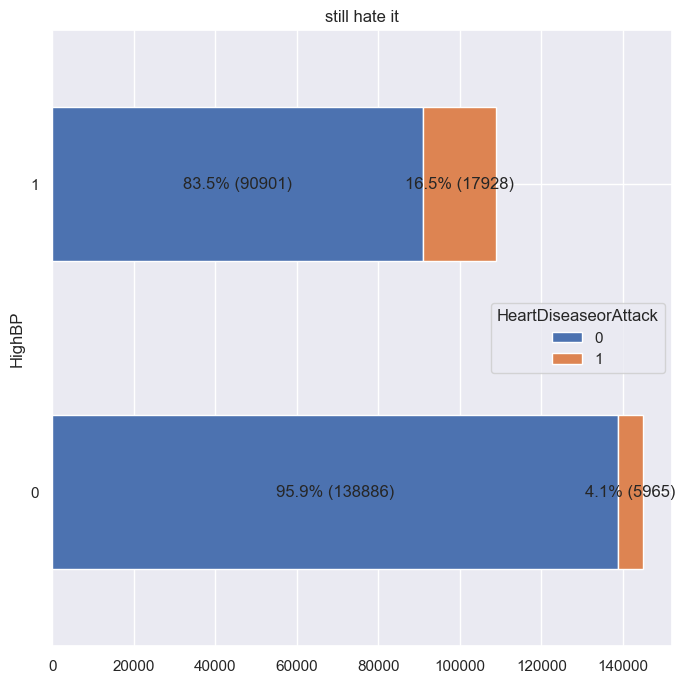

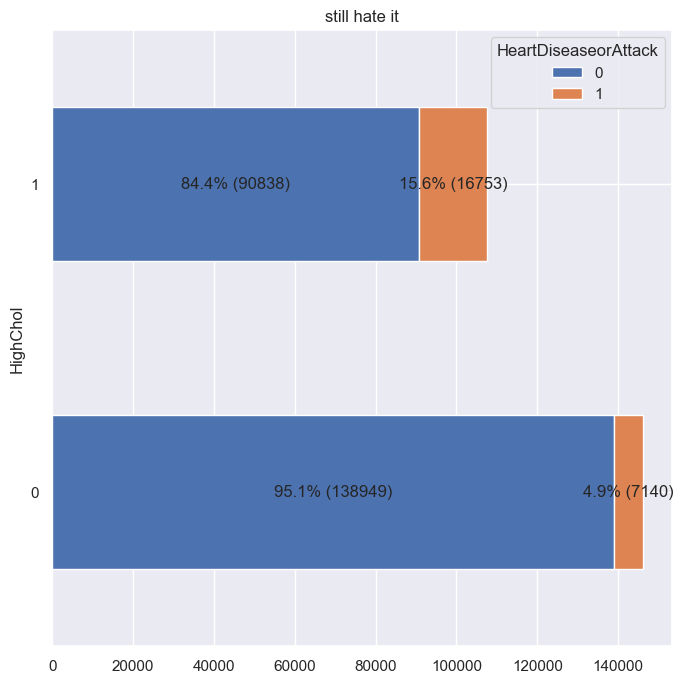

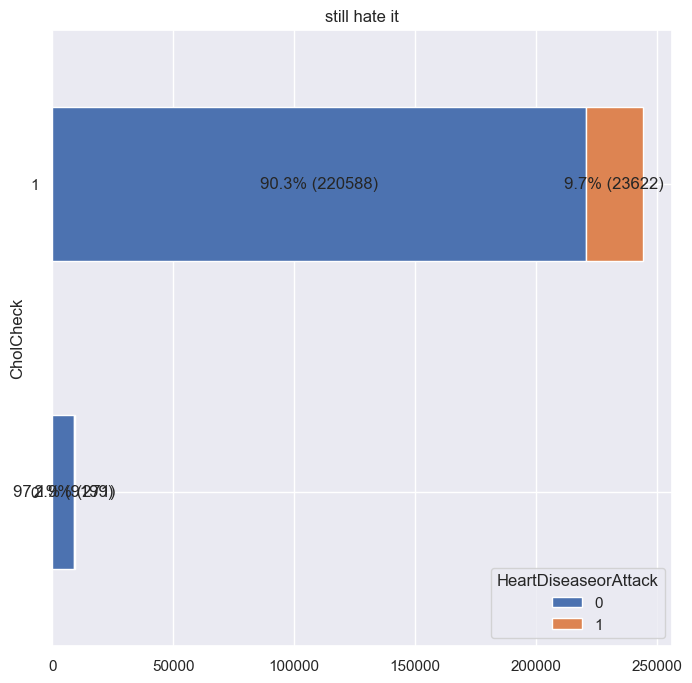

C:\Users\admin\AppData\Local\Temp\ipykernel_5448\4122189027.py:9: RuntimeWarning: invalid value encountered in cast
  label = str(round((pivot_table.loc[i][j]/sum(pivot_table.loc[i]))*100,1)) + "% (" + str(pivot_table.loc[i][j].astype('int64')) + ")"


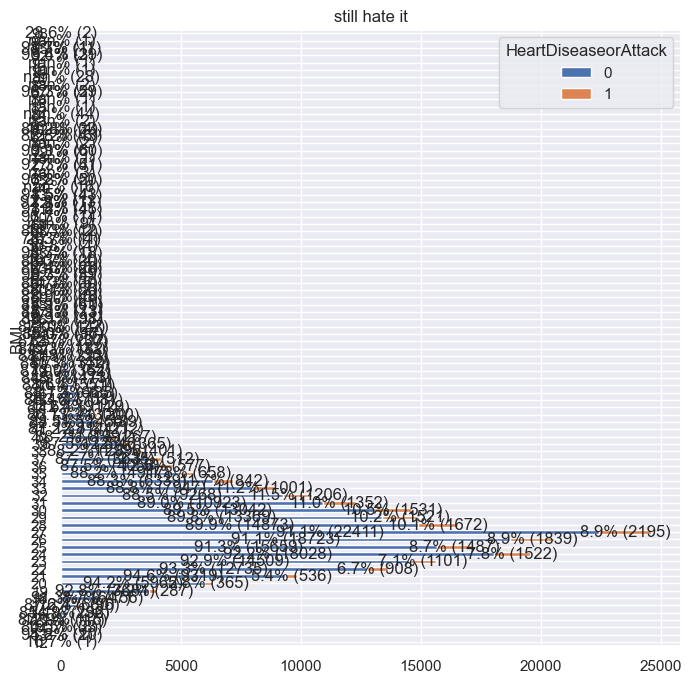

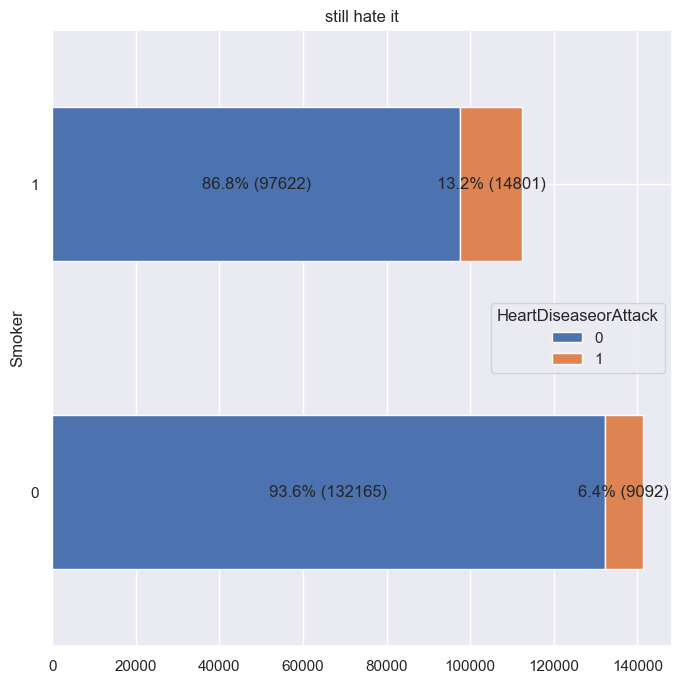

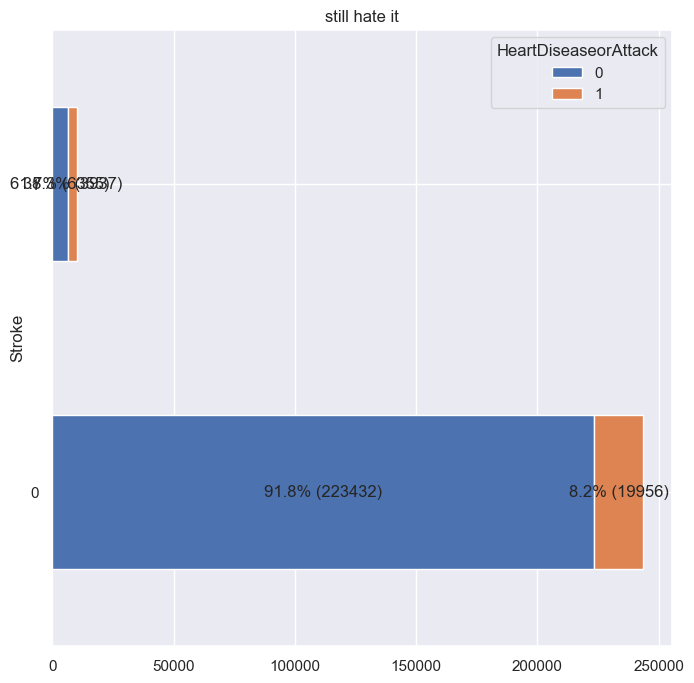

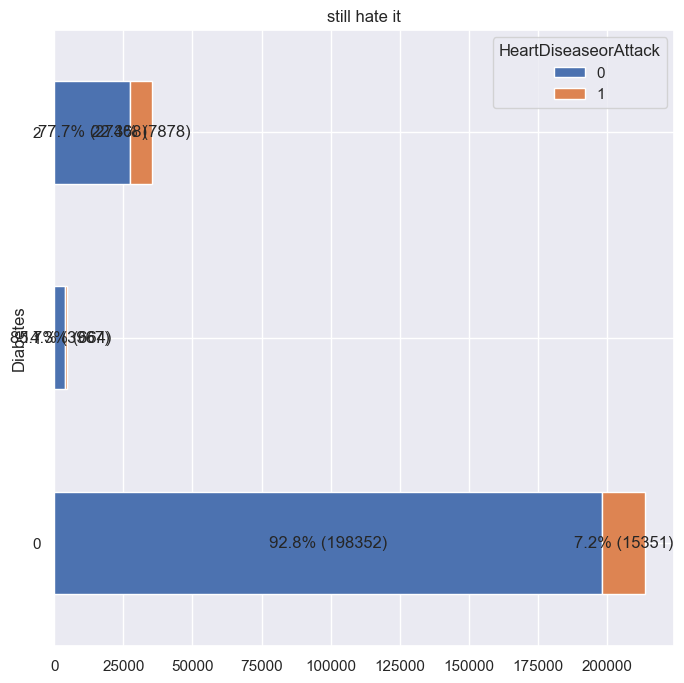

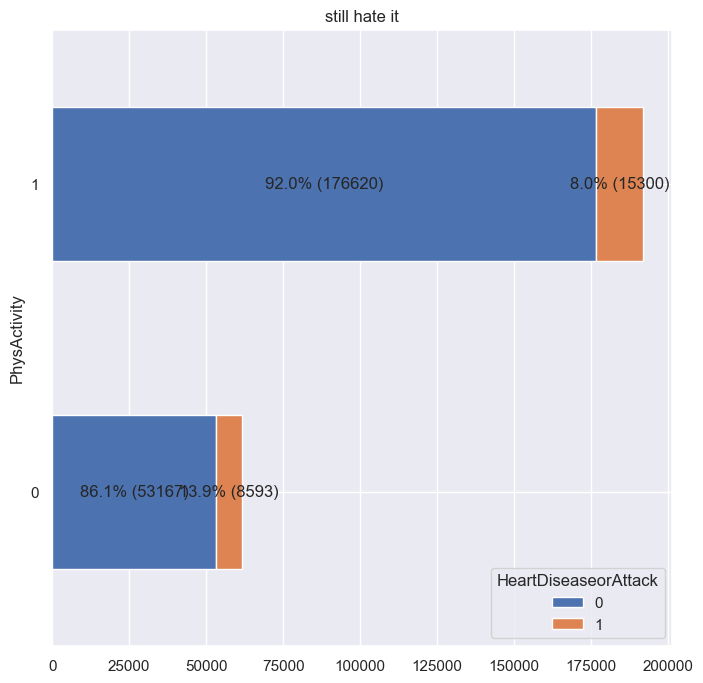

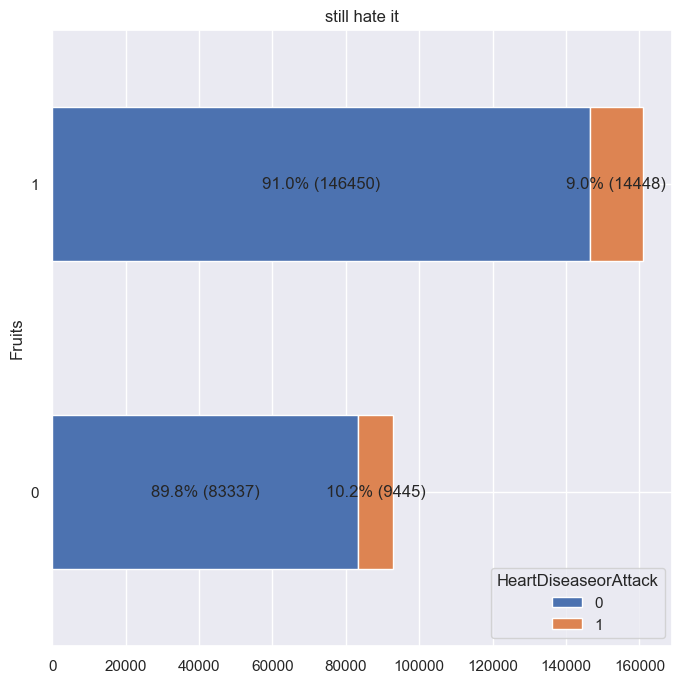

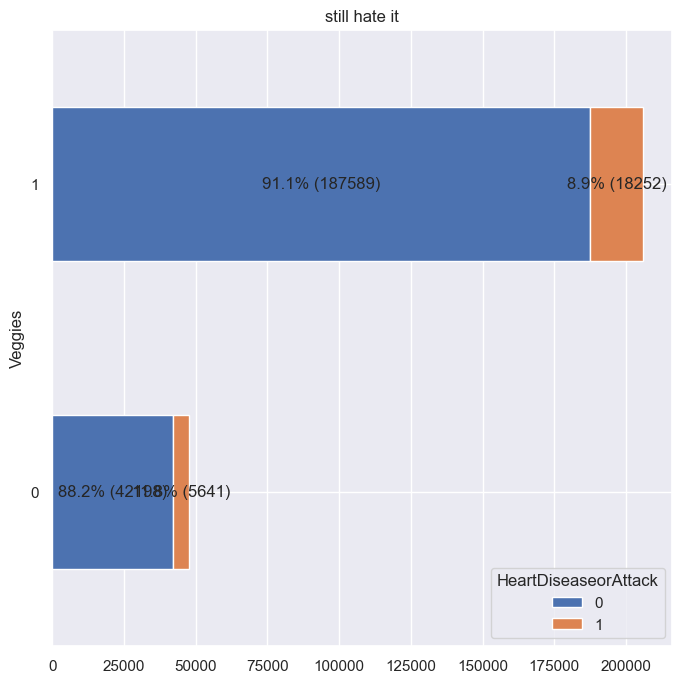

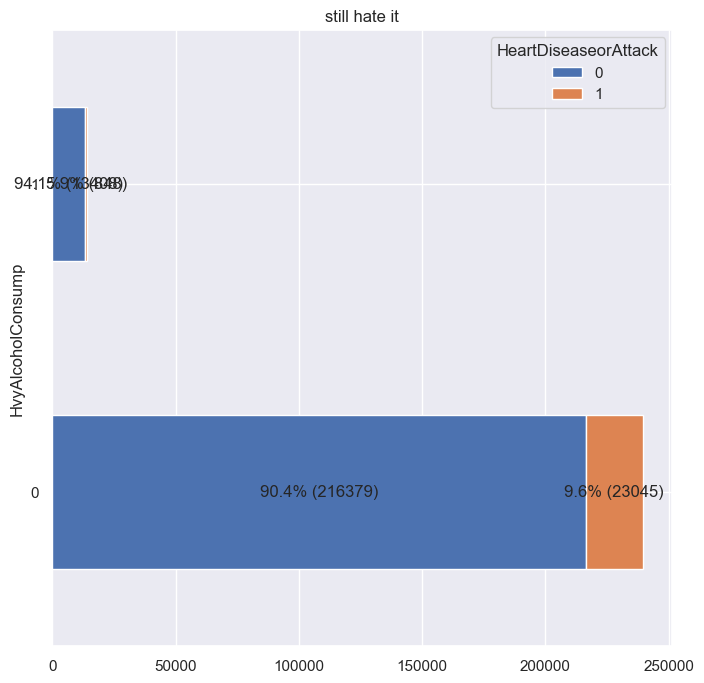

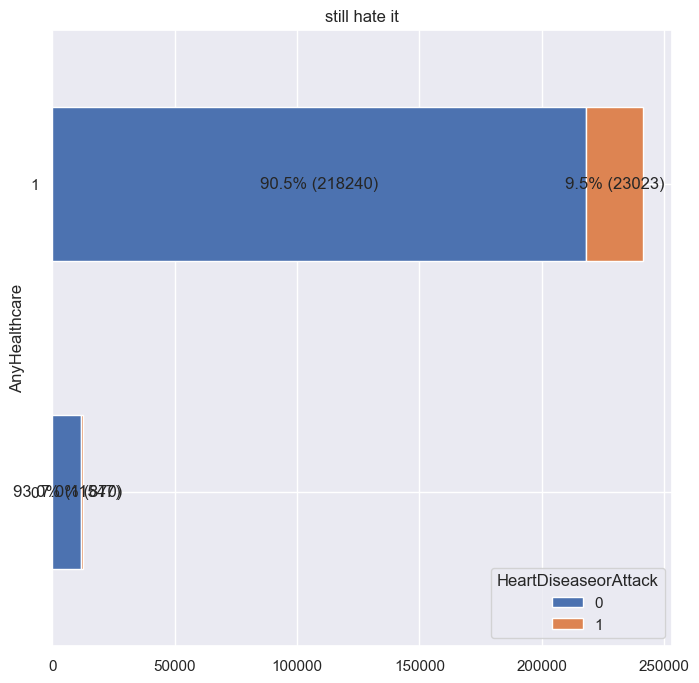

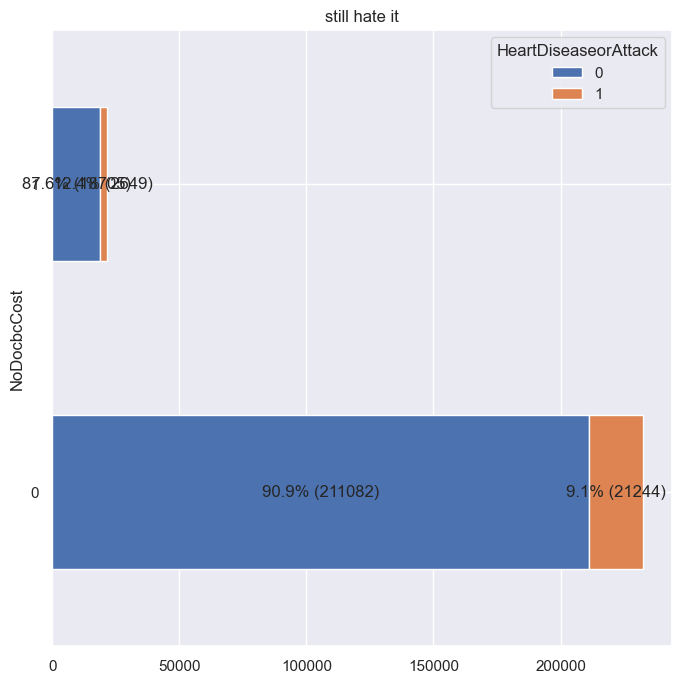

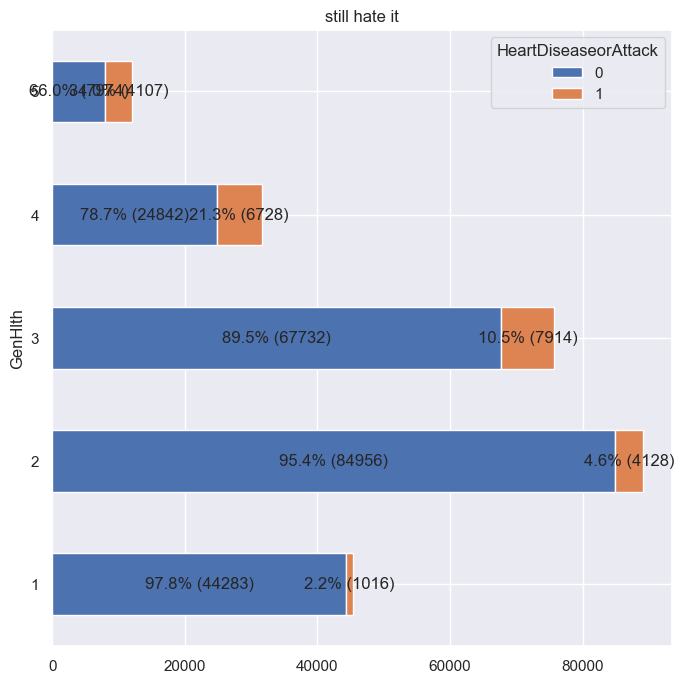

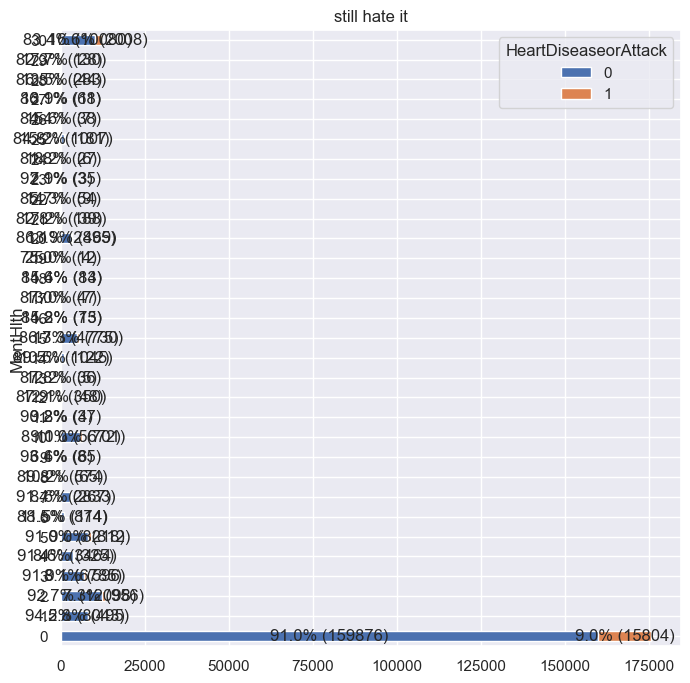

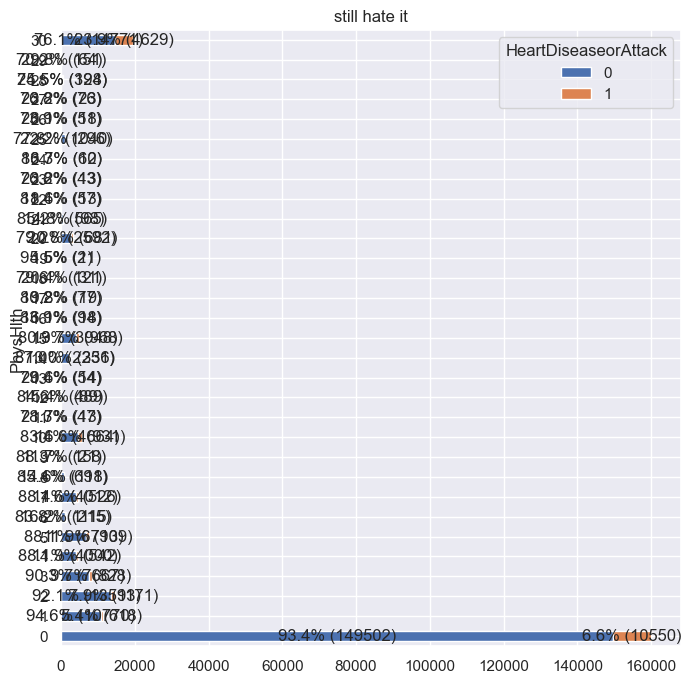

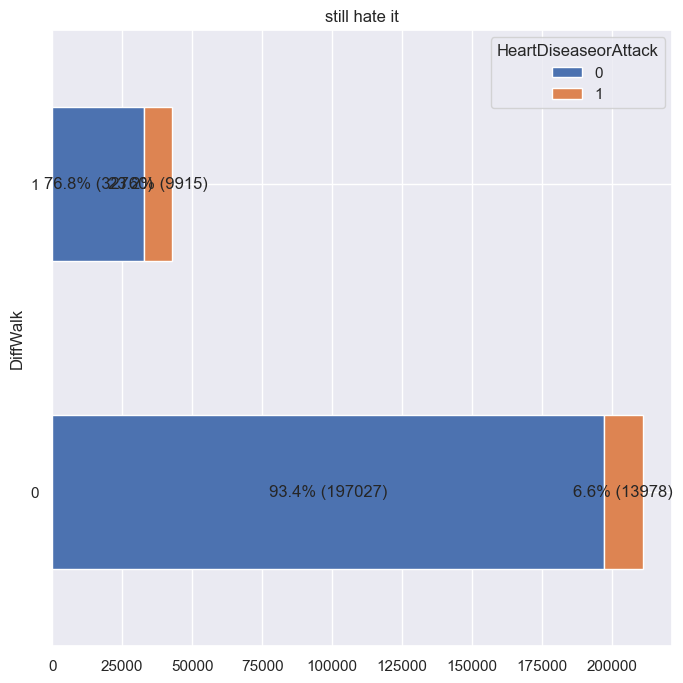

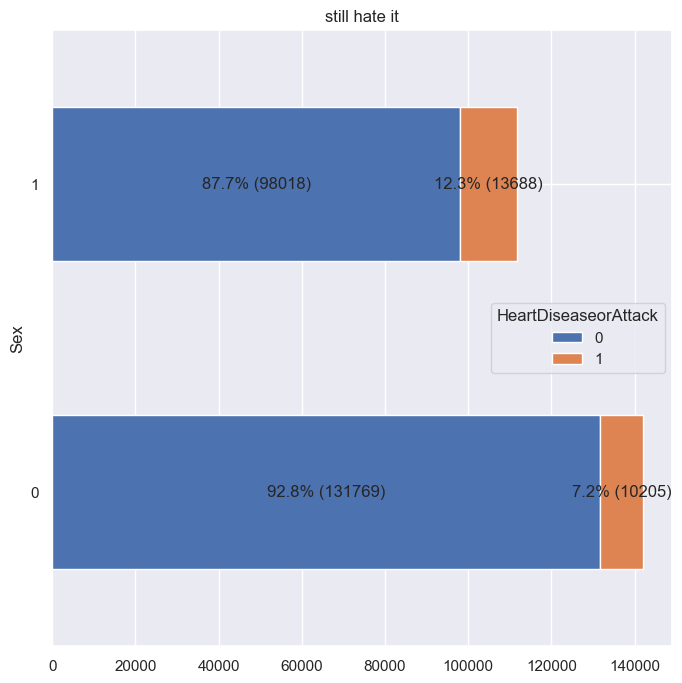

ValueError: Grouper for 'Age' not 1-dimensional

In [26]:
for column in data.columns[1:]:
    plot = data.pivot_table(index = [column], columns = 'HeartDiseaseorAttack', values = 'Age', aggfunc = 'count')
    plot_figure(plot, "still hate it",10,8,8)
   